## Calculate Precision and Recall on Sample Data

> Warning, this example only works if you have pandas and scikit learn installed.

Use templates created with [`functools.partials`](https://docs.python.org/2/library/functools.html#functools.partial) or make your own. Here is an illustrative example of calculating precision and recall.

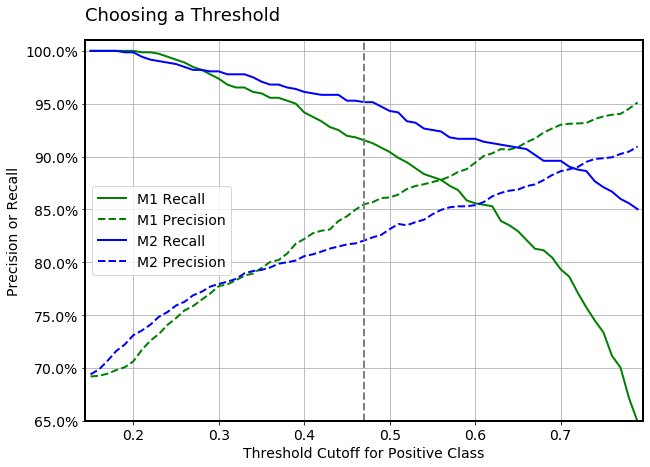

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, precision_score

save = True
from plit import pr_curve

local_dir = '../data/processed'
d1 = pd.read_csv(os.path.join(local_dir, 'softmax-model-1.csv'))
d2 = pd.read_csv(os.path.join(local_dir, 'softmax-model-2.csv'))

def calc_metrics_threshold(df, thresholds):
    recalls = []
    precisions = []
    for thresh in thresholds:
        df['y_pred'] = np.where(df['y_pred_proba'] > thresh, 1, 0)
        recalls.append(recall_score(df['y_true'], df['y_pred']))
        precisions.append(precision_score(df['y_true'], df['y_pred']))
    return recalls, precisions

thresholds = np.arange(0.15, 0.80, 0.01)
recalls_1, precisions_1 = calc_metrics_threshold(d1, thresholds)
recalls_2, precisions_2 = calc_metrics_threshold(d2, thresholds)

ax = pr_curve(
    x = [thresholds], 
    y = [recalls_1, precisions_1, recalls_2, precisions_2],
    labels=['M1 Recall', 'M1 Precision', 'M2 Recall', 'M2 Precision'],
    ylim = (0.65, 1.01),
    vref = 0.47,
    figname="precision_recall.png" if save else None,
)